<a href="https://colab.research.google.com/github/PatriciaBota/BioSPPy/blob/master/Physioma2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Classification Using BioSPPy

On this example we will perform the classification of signal tyoes using the BiosPPy library.
To perform this example every cell must be executed. To do so click run ([ ]) in the top left of every cell.
A warning will appear to reset all runtimes before running, click to accept.

In [1]:
#@title Import Time Series Features Library
import warnings
warnings.filterwarnings('ignore')
# Clone the repo.
!git clone https://github.com/PatriciaBota/BioSPPy
!pip install pyhrv

Cloning into 'BioSPPy'...
remote: Enumerating objects: 965, done.
remote: Total 965 (delta 0), reused 0 (delta 0), pack-reused 965
Receiving objects: 100% (965/965), 2.42 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (619/619), done.
     |████████████████████████████████| 1.7MB 4.8MB/s 
     |████████████████████████████████| 81kB 32.0MB/s 
     |████████████████████████████████| 235kB 55.4MB/s 
     |████████████████████████████████| 40kB 18.7MB/s 
  Created wheel for spectrum: filename=spectrum-0.7.5-cp36-cp36m-linux_x86_64.whl size=234264 sha256=b2c71ca793ff8f94d2004f34dddf96c4ee9a81c7d642e5bb8519780fea6fd59f
  Stored in directory: /root/.cache/pip/wheels/77/45/82/05503d66a576e2361ab90f4e93f4491c3b83211cfe4eafb581
  Created wheel for shortuuid: filename=shortuuid-0.5.0-cp36-none-any.whl size=5499 sha256=772f6583f1db7b9230e2efdd0f1d39acf9c208e2b5b69dc6d35978730b59b00a
  Stored in directory: /root/.cache/pip/wheels/3f/eb/fd/69e5177f67b505e44acbd1aedfbe44b91768ee0c4cd5636576
Success

If the import was sucessfull, after refreshing, the BioSPPy library will appear on the Files tab on your left side of the screen.

# Dataset

In this example you can choose to use your own files or upload the our example file given [here](https://drive.google.com/file/d/17oAG0ZxV-w_WaWeKCU1Lrr8qFiNjj0T2/view?usp=sharing). Upload your file in the files tab by dropping the file on the contender or clicking the upload button.

Our example file contains Electrodermal Activity (EDA), Respiration (RESP), Electrocardiography (ECG), and Blood Volume Pulse (BVP) data. 

Open the .csv file to take a look at the data. As it can be seen A1 to A6 are the analog channels to which the sensors where connected, however, at first glance, there is no way to know to which each modality it consists of.

In this work, we will automatically detect the sensor modality using a machine learning algorithm.

In [0]:
#@title Import libraries
import numpy as np
from sklearn.model_selection import train_test_split
#import BioSPPy as bs
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

# DATA


If you are using your own file, replace "BITALINO_DATA.csv" with the name of your file. [LINK for the data file](https://drive.google.com/file/d/10o8rxF7YQWa_J1EjiyO7whZY4uB0A8c3/view?usp=sharing)

In [29]:
#@title Load data

# read the data file
signals = pd.read_csv('BITALINO_DATA.csv', sep=';')
# Get the acquisition device sampling rate
sampling_rate = int(signals['Sampling Rate'][0])
sampling_rate

1000

In [30]:
signals

,TIMESTAMP,TIMESTAMP_DEVICE,COUNTER,D1,D2,D3,D4,A1,A2,A3,A4,A5,A6,MARKER,TIMESTAMP_REAL,Sampling Rate
0,0.000,0.000,0,1,1,0,0,443,473,265,510,0,0,0,1.515334e+09,1000.0
1,0.001,0.000,1,1,1,0,0,443,473,265,510,0,0,0,NaN,NaN
2,0.002,0.000,2,1,1,0,0,443,473,265,510,0,0,0,NaN,NaN
3,0.003,0.000,3,1,1,0,0,443,473,265,510,0,0,0,NaN,NaN
4,0.004,0.001,4,1,1,0,0,442,474,265,511,0,0,0,NaN,NaN
5,0.005,0.001,5,1,1,0,0,442,473,265,511,0,0,0,NaN,NaN
6,0.006,0.001,6,1,1,0,0,441,474,265,510,0,0,0,NaN,NaN
7,0.007,0.001,7,1,1,0,0,441,475,265,510,0,0,0,NaN,NaN
8,0.008,0.001,8,1,1,0,0,440,476,265,510,0,0,0,NaN,NaN
9,0.009,0.002,9,1,1,0,0,440,476,265,510,0,0,0,NaN,NaN


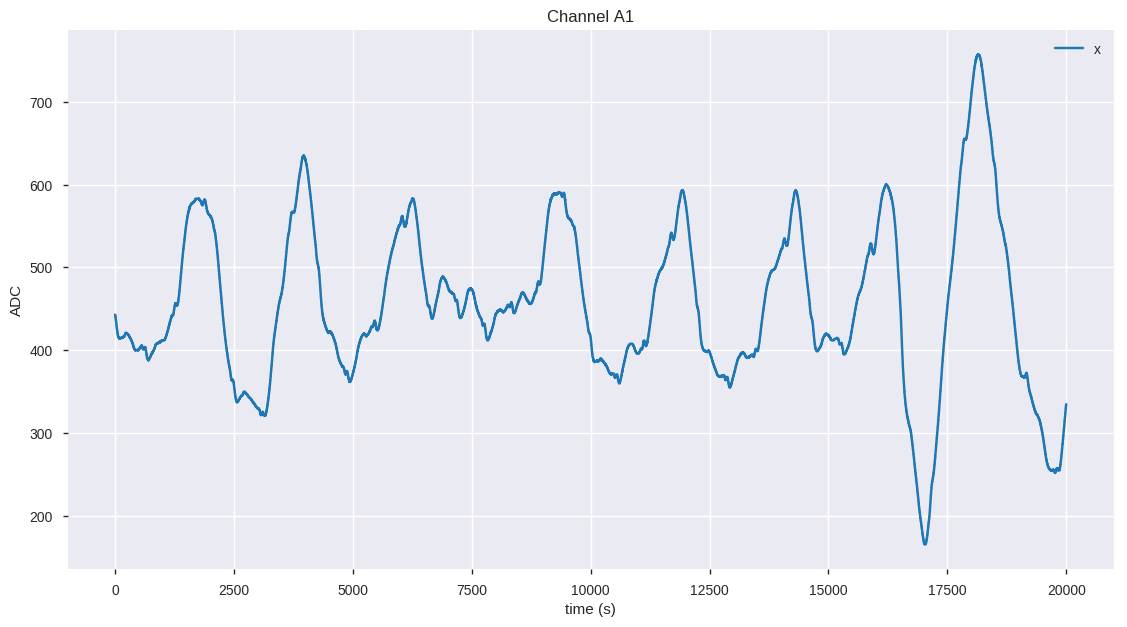

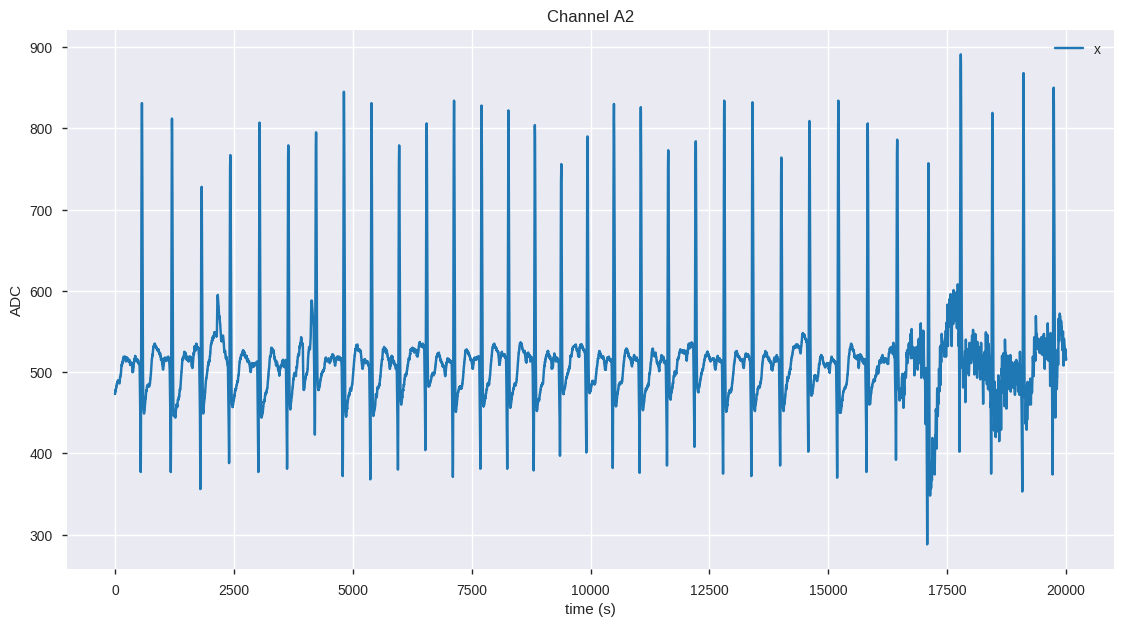

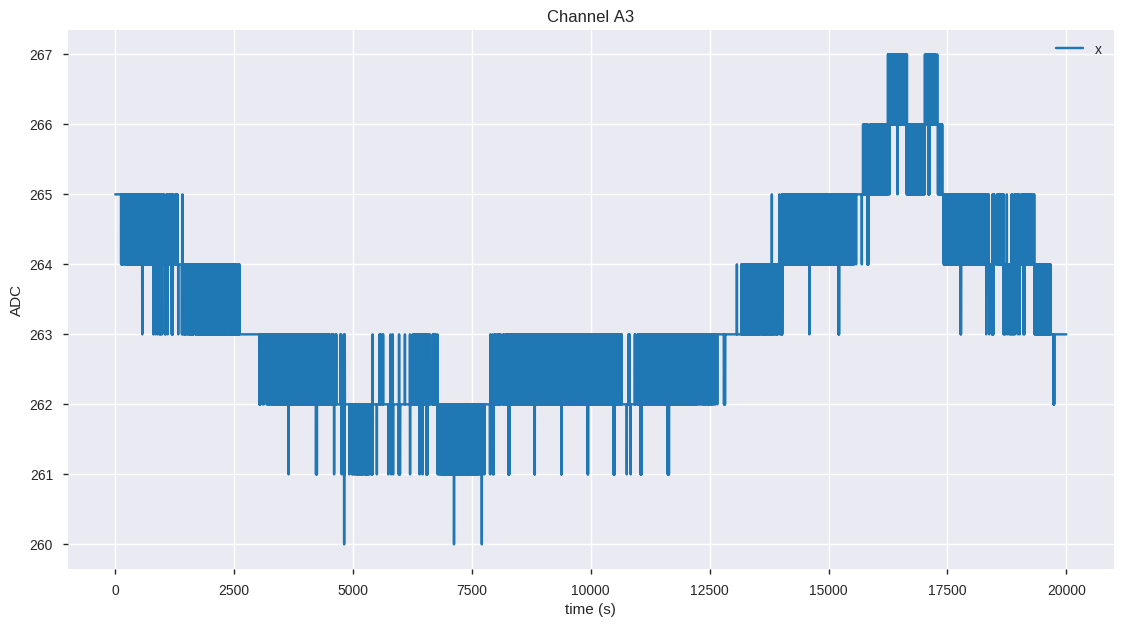

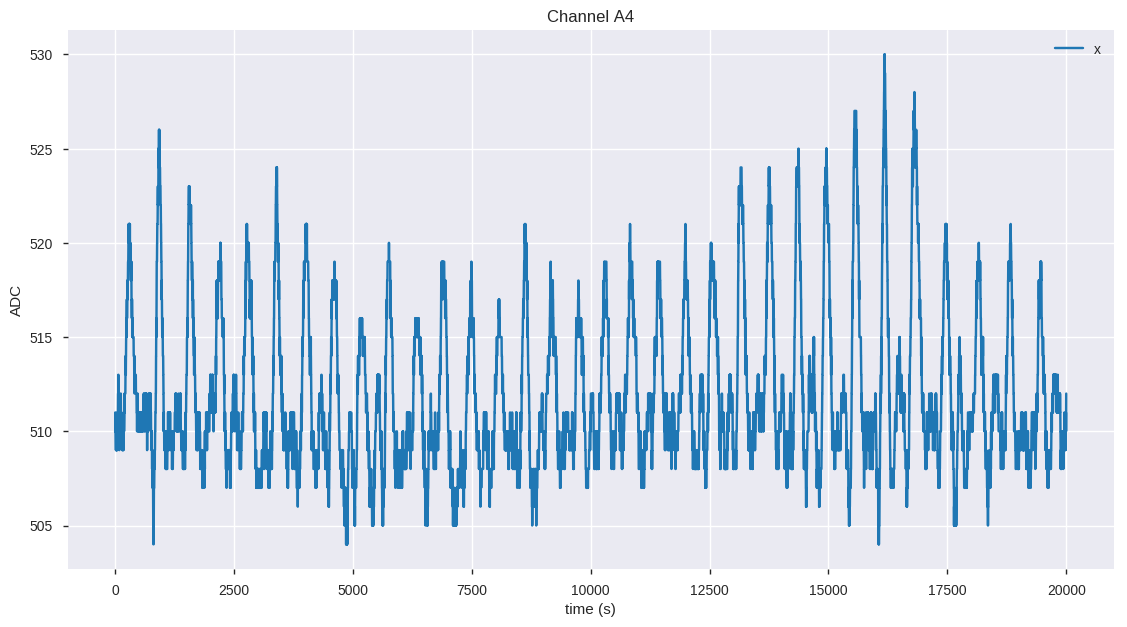

In [31]:
#@Signal Preview
windows_time = 20
window_size = int(sampling_rate * windows_time)

my_dpi = 100
plt.figure(figsize=(1350 / my_dpi, 700 / my_dpi), dpi=my_dpi)
plt.tight_layout()
plt_size = windows_time*sampling_rate
plt.plot(signals.A1[:window_size])
plt.xlabel("time (s)")
plt.ylabel("ADC")
plt.title("Channel A1")
plt.legend('x axis')
plt.show()

#@Signal Preview
plt.figure(figsize=(1350 / my_dpi, 700 / my_dpi), dpi=my_dpi)
plt.tight_layout()
plt_size = windows_time*sampling_rate
plt.plot(signals.A2[:window_size])
plt.xlabel("time (s)")
plt.ylabel("ADC")
plt.title("Channel A2")
plt.legend('x axis')
plt.show()

#@Signal Preview
plt.figure(figsize=(1350 / my_dpi, 700 / my_dpi), dpi=my_dpi)
plt.tight_layout()
plt_size = windows_time*sampling_rate
plt.plot(signals.A3[:window_size])
plt.xlabel("time (s)")
plt.ylabel("ADC")
plt.title("Channel A3")
plt.legend('x axis')
plt.show()

#@Signal Preview
plt.figure(figsize=(1350 / my_dpi, 700 / my_dpi), dpi=my_dpi)
plt.tight_layout()
plt_size = windows_time*sampling_rate
plt.plot(signals.A4[:window_size])
plt.xlabel("time (s)")
plt.ylabel("ADC")
plt.title("Channel A4")
plt.legend('x axis')
plt.show()

In [0]:
#@Data Preparation
# concat all the sensor modalities
data = np.hstack((signals.A1.values, signals.A2.values, signals.A3.values, signals.A4.values))

In [33]:
data.shape

(2334000,)

# Key ML Terminology
![alt text](https://i.ibb.co/BCgJsFn/Captura-de-ecr-2019-09-26-s-16-30-41.png) [[1](http://cs229.stanford.edu/notes2019fall/cs229-notes1.pdf)]

Given a training set, to learn a function h : X 􏰀→ Y so that h(x) is a “good” predictor for the corresponding value of y. For historical reasons, this function h is called a hypothesis [1](http://cs229.stanford.edu/notes2019fall/cs229-notes1.pdf).


A **feature** is an input variable—the x variable in simple linear regression [2](https://developers.google.com/machine-learning/crash-course/framing/ml-terminology).

A **label** is the thing we're predicting—the y variable in simple linear regression. The label could be the future price of wheat, the kind of animal shown in a picture, the meaning of an audio clip, or just about anything [2](https://developers.google.com/machine-learning/crash-course/framing/ml-terminology).

# Feature Extraction
![alt text](https://i.ibb.co/StPzn0v/Captura-de-ecr-2019-09-26-s-16-12-11.png)

In [34]:
cd BioSPPy

/content/BioSPPy


In [0]:
import biosppy as bs

In [36]:
cd biosppy/features

/content/BioSPPy/biosppy/features


In [37]:
data.shape

(2334000,)

In [38]:
# Feature Extraction
windows_time = 8
window_size = int(sampling_rate * windows_time)

feature_vector, _ = bs.features.feature_vector.get_feat(data, sig_lab='Signal', sampling_rate=sampling_rate, windows_len=windows_time, segment=True, save=False)

<START Feature Extraction>
<END Feature Extraction>
Time:  22.027633905410767  seconds


In [39]:
feature_vector

,Signal_mean,Signal_median,Signal_var,Signal_std,Signal_abs_dev,Signal_kurtosis,Signal_skewness,Signal_iqr,Signal_meanadev,Signal_medadev,Signal_rms,Signal_statistic_hist0,Signal_statistic_hist1,Signal_statistic_hist2,Signal_statistic_hist3,Signal_statistic_hist4,Signal_statistic_hist5,Signal_statistic_hist6,Signal_statistic_hist7,Signal_statistic_hist8,Signal_statistic_hist9,Signal_statistic_hist10,Signal_statistic_hist11,Signal_statistic_hist12,Signal_statistic_hist13,Signal_statistic_hist14,Signal_statistic_hist15,Signal_statistic_hist16,Signal_statistic_hist17,Signal_statistic_hist18,Signal_statistic_hist19,Signal_statistic_hist20,Signal_statistic_hist21,Signal_statistic_hist22,Signal_statistic_hist23,Signal_statistic_hist24,Signal_statistic_hist25,Signal_statistic_hist26,Signal_statistic_hist27,Signal_statistic_hist28,...,Signal_statistic_hist81,Signal_statistic_hist82,Signal_statistic_hist83,Signal_statistic_hist84,Signal_statistic_hist85,Signal_statistic_hist86,Signal_statistic_hist87,Signal_statistic_hist88,Signal_maxAmp,Signal_minAmp,Signal_max,Signal_min,Signal_dist,Signal_autocorr,Signal_zero_cross,Signal_meanadiff,Signal_medadiff,Signal_mindiff,Signal_maxdiff,Signal_sadiff,Signal_meandiff,Signal_meddiff,Signal_temp_centroid,Signal_total_energy,Signal_minpeaks,Signal_maxpeaks,Signal_temp_dev,Signal_counter,Signal_spectral_maxpeaks,Signal_spect_var,Signal_curve_distance,Signal_spectral_roll_off,Signal_spectral_roll_on,Signal_spectral_dec,Signal_spectral_slope,Signal_spectral_spread,Signal_spectral_kurtosis,Signal_spectral_skewness,Signal_max_frequency,Signal_fundamental_frequency
0,457.390000,442.0,5737.331066,75.745172,488418.0,-0.698255,0.367132,107.00,62.225268,43.0,463.618621,0.003720,0.001736,0.002516,0.001984,0.002764,0.004287,0.003614,0.004039,0.001311,0.000567,0.000461,0.001807,0.002870,0.001701,0.002303,0.002657,0.002055,0.002728,0.002338,0.003401,0.002941,0.002338,0.008291,0.005669,0.006129,0.006767,0.010416,0.009885,0.010416,...,0.000709,0.000461,0.000850,0.000602,0.000815,0.000673,0.001063,0.002020,177.610000,0.390000,635,321,8919.356245,457.390000,0,0.277285,0.0,0,2,2218,0.000000,0.0,0.0,2.149691e+08,143,140,0.0,8000,1331,0.0,-1.424718e+07,0.0,0.0,0.001482,-0.021497,19386.079575,1.817407,-0.024594,0.0,0.0
1,458.431875,449.0,4545.141752,67.417666,457141.0,-0.975333,0.451095,112.00,57.598983,52.0,463.362016,0.001730,0.001730,0.002431,0.002945,0.006357,0.009629,0.005376,0.003225,0.002851,0.002197,0.003926,0.008274,0.004908,0.008835,0.009489,0.009442,0.014724,0.010985,0.004113,0.013135,0.004955,0.006404,0.008133,0.007199,0.002010,0.002197,0.001823,0.001215,0.001916,...,0.002150,0.001730,0.002571,0.002477,0.002244,0.004160,0.012107,0.004628,134.568125,0.431875,593,355,8882.096742,458.431875,0,0.266408,0.0,0,2,2131,0.011126,0.0,0.0,2.147312e+08,152,156,0.0,8000,1321,0.0,-2.973073e+07,0.0,0.0,0.001705,-0.044684,17992.344874,1.889970,-0.141300,0.0,0.0
2,455.808375,457.0,16185.654862,127.222855,805445.0,-0.257902,0.037166,182.00,100.691989,89.0,473.228176,0.001355,0.000678,0.000471,0.000546,0.000584,0.000395,0.000433,0.000376,0.000320,0.000395,0.000489,0.000527,0.000753,0.004781,0.001525,0.001092,0.000847,0.000979,0.001054,0.000866,0.001280,0.001525,0.001318,0.001995,0.001525,0.001016,0.001242,0.001016,0.002805,...,0.000489,0.000527,0.000489,0.000508,0.000602,0.000565,0.000828,0.001864,301.191625,0.191625,757,166,9205.729122,455.808375,0,0.358795,0.0,0,2,2870,-0.022003,0.0,0.0,2.239729e+08,100,110,0.0,8000,1314,0.0,-2.991943e+07,0.0,0.0,0.001494,-0.044949,17134.315403,1.893481,-0.155243,0.0,0.0
3,439.698875,432.0,5242.151218,72.402702,468329.0,-0.615142,-0.006962,100.00,58.976368,43.0,445.619340,0.002247,0.001011,0.002697,0.001423,0.001498,0.002173,0.001498,0.001161,0.001348,0.000787,0.000899,0.001049,0.000862,0.000749,0.000974,0.000599,0.000749,0.000974,0.000862,0.000749,0.001386,0.001498,0.003708,0.003708,0.004870,0.005544,0.002173,0.001348,0.001311,...,0.001798,0.002285,0.005094,0.008053,0.007379,0.001199,0.00

## Cleaning Data

In [40]:
# Remove redundant features
feature_vector = bs.features.feature_vector.remove_correlatedFeatures(feature_vector)

Removing Signal_abs_dev
Removing Signal_autocorr
Removing Signal_iqr
Removing Signal_max
Removing Signal_meanadev
Removing Signal_meanadiff
Removing Signal_medadev
Removing Signal_median
Removing Signal_rms
Removing Signal_sadiff
Removing Signal_spectral_slope
Removing Signal_spectral_spread
Removing Signal_statistic_hist39
Removing Signal_statistic_hist46
Removing Signal_statistic_hist48
Removing Signal_statistic_hist50
Removing Signal_statistic_hist55
Removing Signal_statistic_hist63
Removing Signal_statistic_hist68
Removing Signal_statistic_hist71
Removing Signal_statistic_hist75
Removing Signal_std
Removing Signal_total_energy


In [41]:
feature_vector

,Signal_mean,Signal_var,Signal_kurtosis,Signal_skewness,Signal_statistic_hist0,Signal_statistic_hist1,Signal_statistic_hist2,Signal_statistic_hist3,Signal_statistic_hist4,Signal_statistic_hist5,Signal_statistic_hist6,Signal_statistic_hist7,Signal_statistic_hist8,Signal_statistic_hist9,Signal_statistic_hist10,Signal_statistic_hist11,Signal_statistic_hist12,Signal_statistic_hist13,Signal_statistic_hist14,Signal_statistic_hist15,Signal_statistic_hist16,Signal_statistic_hist17,Signal_statistic_hist18,Signal_statistic_hist19,Signal_statistic_hist20,Signal_statistic_hist21,Signal_statistic_hist22,Signal_statistic_hist23,Signal_statistic_hist24,Signal_statistic_hist25,Signal_statistic_hist26,Signal_statistic_hist27,Signal_statistic_hist28,Signal_statistic_hist29,Signal_statistic_hist30,Signal_statistic_hist31,Signal_statistic_hist32,Signal_statistic_hist33,Signal_statistic_hist34,Signal_statistic_hist35,...,Signal_statistic_hist73,Signal_statistic_hist74,Signal_statistic_hist76,Signal_statistic_hist77,Signal_statistic_hist78,Signal_statistic_hist79,Signal_statistic_hist80,Signal_statistic_hist81,Signal_statistic_hist82,Signal_statistic_hist83,Signal_statistic_hist84,Signal_statistic_hist85,Signal_statistic_hist86,Signal_statistic_hist87,Signal_statistic_hist88,Signal_maxAmp,Signal_minAmp,Signal_min,Signal_dist,Signal_zero_cross,Signal_medadiff,Signal_mindiff,Signal_maxdiff,Signal_meandiff,Signal_meddiff,Signal_temp_centroid,Signal_minpeaks,Signal_maxpeaks,Signal_temp_dev,Signal_counter,Signal_spectral_maxpeaks,Signal_spect_var,Signal_curve_distance,Signal_spectral_roll_off,Signal_spectral_roll_on,Signal_spectral_dec,Signal_spectral_kurtosis,Signal_spectral_skewness,Signal_max_frequency,Signal_fundamental_frequency
0,457.390000,5737.331066,-0.698255,0.367132,0.003720,0.001736,0.002516,0.001984,0.002764,0.004287,0.003614,0.004039,0.001311,0.000567,0.000461,0.001807,0.002870,0.001701,0.002303,0.002657,0.002055,0.002728,0.002338,0.003401,0.002941,0.002338,0.008291,0.005669,0.006129,0.006767,0.010416,0.009885,0.010416,0.004358,0.006944,0.005208,0.004535,0.006625,0.007015,0.004606,...,0.007582,0.003862,0.000531,0.000567,0.000390,0.000602,0.000461,0.000709,0.000461,0.000850,0.000602,0.000815,0.000673,0.001063,0.002020,177.610000,0.390000,321,8919.356245,0,0.0,0,2,0.000000,0.0,0.0,143,140,0.0,8000,1331,0.0,-1.424718e+07,0.0,0.0,0.001482,1.817407,-0.024594,0.0,0.0
1,458.431875,4545.141752,-0.975333,0.451095,0.001730,0.001730,0.002431,0.002945,0.006357,0.009629,0.005376,0.003225,0.002851,0.002197,0.003926,0.008274,0.004908,0.008835,0.009489,0.009442,0.014724,0.010985,0.004113,0.013135,0.004955,0.006404,0.008133,0.007199,0.002010,0.002197,0.001823,0.001215,0.001916,0.002057,0.001402,0.002524,0.002337,0.003225,0.011826,0.005329,...,0.001916,0.002010,0.002758,0.002150,0.001870,0.001356,0.001963,0.002150,0.001730,0.002571,0.002477,0.002244,0.004160,0.012107,0.004628,134.568125,0.431875,355,8882.096742,0,0.0,0,2,0.011126,0.0,0.0,152,156,0.0,8000,1321,0.0,-2.973073e+07,0.0,0.0,0.001705,1.889970,-0.141300,0.0,0.0
2,455.808375,16185.654862,-0.257902,0.037166,0.001355,0.000678,0.000471,0.000546,0.000584,0.000395,0.000433,0.000376,0.000320,0.000395,0.000489,0.000527,0.000753,0.004781,0.001525,0.001092,0.000847,0.000979,0.001054,0.000866,0.001280,0.001525,0.001318,0.001995,0.001525,0.001016,0.001242,0.001016,0.002805,0.001864,0.007210,0.002711,0.003200,0.002052,0.001054,0.001431,...,0.001525,0.000640,0.000602,0.000508,0.000546,0.000565,0.000395,0.000489,0.000527,0.000489,0.000508,0.000602,0.000565,0.000828,0.001864,301.191625,0.191625,166,9205.729122,0,0.0,0,2,-0.022003,0.0,0.0,100,110,0.0,8000,1314,0.0,-2.991943e+07,0.0,0.0,0.001494,1.893481,-0.155243,0.0,0.0
3,439.698875,5242.151218,-0.615142,-0.006962,0.002247,0.001011,0.002697,0.001423,0.001498,0.002173,0.001498,0.001161,0.001348,0.000787,0.000899,0.001049,0.000862,0.000749,0.000974,0.000599,0.000749,0.000974,0.000862,0.000749,0.001386,0.001498,0.003708,0.003708,0.004870,0.005544,0.002173,0.001348,0.

# Splitting Data

![alt text](https://developers.google.com/machine-learning/crash-course/images/PartitionTwoSets.svg) [2](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)

*   training set—a subset to train a model.

*   test set—a subset to test the trained model.

In [42]:
# Get Ground Truth
_l = np.array([1] * len(signals.A1.values) + [2] * len(signals.A2.values) + [3] * len(signals.A3.values) + [4] * len(signals.A4.values))

# Data Segmentation
labels = np.array([_l[i:i + window_size][0] for i in range(0, len(_l), window_size)])[:-1]
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4])

In [43]:
# Separate in train and set set
X_train, X_test, y_train, y_test = train_test_split(feature_vector.values, labels, test_size=0.33, random_state=42)
X_train, y_train

(array([[ 5.11933125e+02,  4.17251184e+01,  1.84586559e-01, ...,
         -4.16015973e-02,  0.00000000e+00,  0.00000000e+00],
        [ 4.78463500e+02,  5.04676651e+03, -1.37588771e+00, ...,
         -1.35529568e-01,  0.00000000e+00,  0.00000000e+00],
        [ 3.16655625e+02,  3.73899823e+00, -1.31859615e+00, ...,
         -2.92694250e-02,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 5.15190875e+02,  3.05096806e+03,  1.27758550e+01, ...,
         -7.13790925e-02,  0.00000000e+00,  0.00000000e+00],
        [ 5.11656500e+02,  3.98527393e+01,  6.33900378e-01, ...,
         -3.31860311e-02,  0.00000000e+00,  0.00000000e+00],
        [ 5.15353625e+02,  2.96833587e+03,  1.40479297e+01, ...,
         -7.07611664e-02,  0.00000000e+00,  0.00000000e+00]]),
 array([4, 1, 3, 3, 1, 2, 3, 3, 3, 3, 1, 4, 2, 3, 3, 4, 4, 2, 3, 2, 3, 3,
        3, 1, 4, 1, 2, 2, 2, 4, 3, 3, 2, 3, 4, 2, 2, 1, 4, 4, 2, 2, 2, 4,
        4, 3, 1, 3, 2, 3, 1, 1, 1, 2, 3, 4, 3, 1, 2, 3, 3, 1, 4, 4, 2, 1,
       

# Learn Model

In [44]:
# Fit supervised Learning Classifiers on the training set data
classifier = bs.classification.supervised_learning.supervised_classification(X_train, y_train)

<START Classification>
Classifier:  Nearest Neighbors
Accuracy: 86.07649517790725 +- 2.638125849290053%
-----------------------------------------
Classifier:  Decision Tree
Accuracy: 97.94674303018334 +- 1.956781645450983%
-----------------------------------------
Classifier:  Random Forest
Accuracy: 99.47368421052632 +- 1.05263157894737%
-----------------------------------------
Classifier:  ExtraTree
Accuracy: 97.90823211875843 +- 3.066725531258458%
-----------------------------------------
Classifier:  AdaBoost
Accuracy: 100.0 +- 0.0%
-----------------------------------------
Classifier:  GradientBoosting
Accuracy: 100.0 +- 0.0%
-----------------------------------------
Classifier:  Gaussian NB
Accuracy: 93.34090385438267 +- 3.420940548737781%
-----------------------------------------
Classifier:  Multinomial NB
Accuracy: 0.0 +- 0.0%
-----------------------------------------
Classifier:  Complement NB
Accuracy: 0.0 +- 0.0%
-----------------------------------------
Classifier:  Berno

![alt text](https://developers.google.com/machine-learning/crash-course/images/WorkflowWithTestSet.svg) [2](https://developers.google.com/machine-learning/crash-course/validation/another-partition)

## Feature Selection


In [45]:
# Feature selection
FS_idx, FS_features_names, FS_X_train = bs.features.feature_vector.FSE(X_train, y_train, feature_vector.columns, classifier, CV=2)

FS_X_test = X_test[:, FS_idx]
FS_X_train = X_train[:, FS_idx]

*** Feature selection started ***
FINAL Features: ['Signal_maxAmp', 'Signal_var', 'Signal_spectral_maxpeaks', 'Signal_min']
Number of selected features 4
Features idx:  [84, 1, 99, 86]
Acc:  [0.8917525773195876, 95.36082474226804, 96.39175257731958, 98.45360824742268]
From  109  features to  4
*** Feature selection finished ***


In [46]:
# Update best classifier for the best feature set
classifier = bs.classification.supervised_learning.supervised_classification(FS_X_train, y_train)

<START Classification>
Classifier:  Nearest Neighbors
Accuracy: 89.7337151509167 +- 2.0765639448557067%
-----------------------------------------
Classifier:  Decision Tree
Accuracy: 96.3292847503374 +- 3.942284232862025%
-----------------------------------------
Classifier:  Random Forest
Accuracy: 97.38191632928473 +- 2.353910511245903%
-----------------------------------------
Classifier:  ExtraTree
Accuracy: 97.90823211875843 +- 1.9658685813365906%
-----------------------------------------
Classifier:  AdaBoost
Accuracy: 78.92761923570652 +- 9.429722613370103%
-----------------------------------------
Classifier:  GradientBoosting
Accuracy: 95.8029689608637 +- 3.575713554600145%
-----------------------------------------
Classifier:  Gaussian NB
Accuracy: 97.40693196405648 +- 2.8837790603085955%
-----------------------------------------
Classifier:  Multinomial NB
Accuracy: 88.60406174911952 +- 5.223697956207863%
-----------------------------------------
Classifier:  Complement NB
A

# Classification

In [0]:
classifier.fit(FS_X_train, y_train)
y_predicted = classifier.predict(FS_X_test)

# Evaluation

In [48]:
target_names = ['Resp', 'ECG', 'EDA', 'BVP']
print('Accuracy (%): ', accuracy_score(y_test, y_predicted)*100)
print(classification_report(y_test, y_predicted, target_names=target_names))
print('\n')

Accuracy (%):  100.0
              precision    recall  f1-score   support

        Resp       1.00      1.00      1.00        27
         ECG       1.00      1.00      1.00        27
         EDA       1.00      1.00      1.00        21
         BVP       1.00      1.00      1.00        22

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97





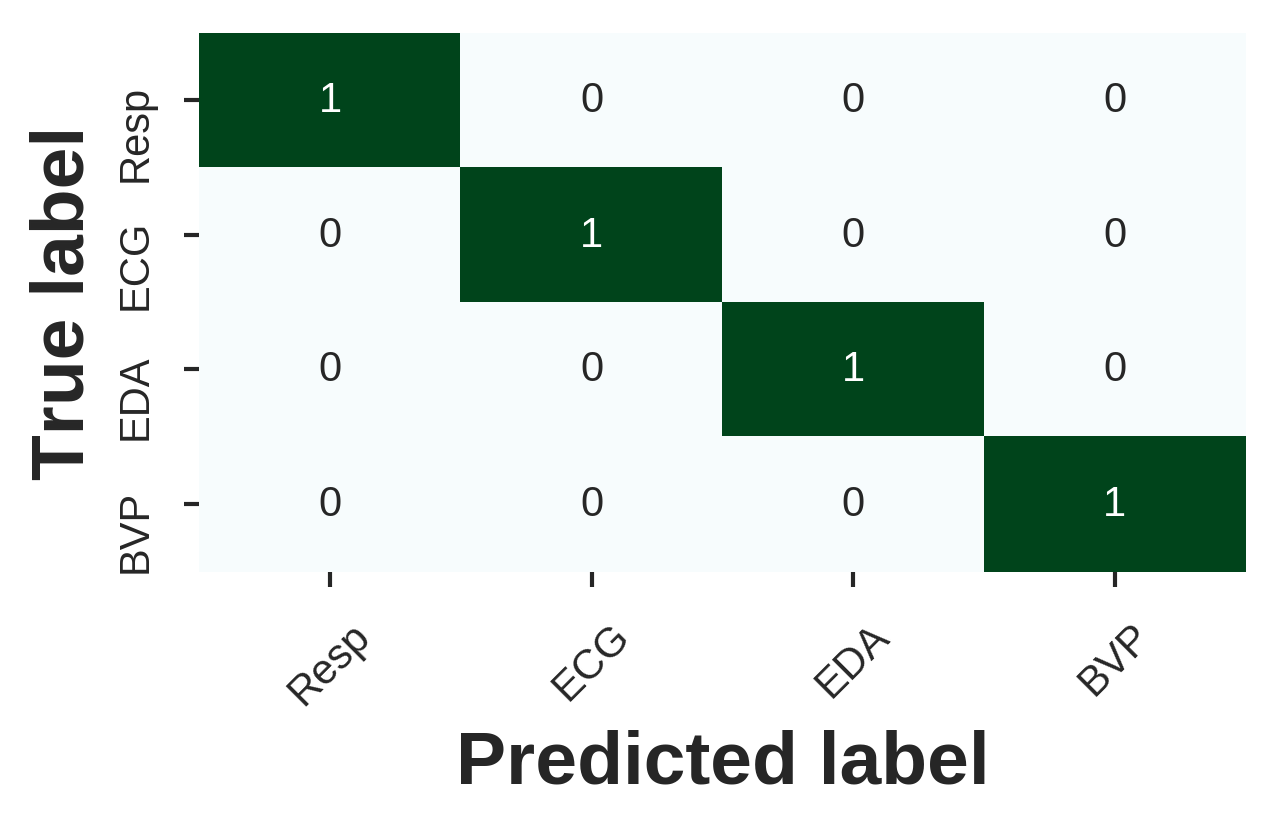

In [49]:
# Confusion Matrix
class_labels = ['Resp','ECG','EDA','BVP']
cm = confusion_matrix(y_test, y_predicted)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=[i for i in class_labels], columns=[i for i in class_labels])
my_dpi = 300
plt.figure(figsize=(1350 / my_dpi, 700 / my_dpi), dpi=my_dpi)
plt.tight_layout()
ax = sb.heatmap(df_cm,  cbar = False, cmap="BuGn", annot=True)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
#plt.savefig('ConfMaxtrixAP.eps', dpi=300, format='eps', bbox_inches='tight')
plt.show()